<a href="https://colab.research.google.com/github/matiascano1/Mi-proyectoDS/blob/main/ProyectoDS_IIParte2_Cano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de diabetes en India
Autor: Matías Cano

## Definición del problema

El dataset elegido está diseñado para ayudar a predecir y analizar la prevalencia de la diabetes y los factores de riesgo entre la población de la India. Incorpora una amplia gama de atributos demográficos, de estilo de vida y clínicos para garantizar una representación holística de los posibles determinantes de la diabetes. Las características del dataset incluyen:

Datos demográficos:

Edad (int) , sexo (Male, Female, other), residencia (Urban, Rural) y cantidad de embarazos (int).

Factores del estilo de vida:

Actividad física (High, Medium, Low), tipo de dieta (Vegetarian, Non-Vegetarian, Vegan), tabaquismo (Never, Current, Former), consumo de alcohol (High, Moderate) y niveles de estrés (High, Medium, Low).

Historial Médico:

Antecedentes familiares de diabetes (Yes, No), hipertensión (Yes, No), afecciones de la tiroides (Yes, No)  y chequeos periódicos (Yes, No).

Métricas clínicas:

IMC (float), niveles de colesterol (float), azúcar en sangre en ayunas (float) y postprandial (float), hemoglobina glicosilada (HBA1C)(float), niveles de vitamina D (float), niveles de proteína C (float), relación cintura-cadera (float), test de glucosa (float), ritmo cardíaco (int),seguro médico (Yes, No),medicación por condición crónica (Yes, No) y síndrome de ovario poliquístico (Yes, No).

**Variable objetivo**: Estado de diabetes (Diabetes_Status), si está presente o no (Yes, No).

**Preguntas de interés:**

###1. ¿Cuáles son los principales factores de riesgo asociados con la diabetes en la población india?

*Hipótesis:* Existe una asociación significativa entre los factores de estilo de vida (dieta, actividad física, tabaquismo, consumo de alcohol, estrés) y la prevalencia de diabetes en la población india.


###2. ¿Existe alguna diferencia en la prevalencia de diabetes entre diferentes grupos demográficos?

Hipótesis: Los factores demográficos (edad, sexo, residencia) influyen en la prevalencia de diabetes en la población india.

###3. ¿Cómo influyen los factores de estilo de vida en el riesgo de diabetes?

Hipótesis: La falta de actividad física regular se asocia con un mayor riesgo de diabetes en la población india.


###4. ¿Cuál es el papel de los antecedentes médicos y familiares en la predicción de la diabetes?

Hipótesis: Los antecedentes médicos (familiares con diabetes, hipertensión, afecciones de la tiroides) aumentan el riesgo de desarrollar diabetes en la población india.

Hipótesis: Las personas con antecedentes familiares de diabetes tienen una mayor probabilidad de desarrollar la enfermedad en comparación con aquellas sin antecedentes familiares.



El **objetivo general** es utilizar los datos para hacer un modelo de machine learning con el fin de predecir quien puede tener diabetes o no.

# **Presentación ejecutiva**

https://docs.google.com/presentation/d/11_-MOceHxI_5YEMBwKSA-tJj_erUDuRO/edit?usp=drive_link&ouid=103215069730318863097&rtpof=true&sd=true

# **Lectura de Datos**

---



**Librerias, configuracion del entorno y lectura del dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # Filtro los warnings que puede generarme el código
warnings.filterwarnings('ignore')
url= 'https://raw.githubusercontent.com/matiascano1/Mi-proyectoDS/refs/heads/main/diabetes_prediction_india.csv'
df=pd.read_csv(url,sep=',')
df.head(10) # verifico la carga correcta del DataSet

Age  Gender   BMI Family_History Physical_Activity       Diet_Type  \
0   48    Male  35.5             No              High  Non-Vegetarian   
1   18   Other  28.7            Yes            Medium  Non-Vegetarian   
2   21   Other  30.0            Yes              High  Non-Vegetarian   
3   25  Female  25.6             No            Medium      Vegetarian   
4   78    Male  38.8             No              High  Non-Vegetarian   
5   60    Male  19.2             No              High      Vegetarian   
6   38  Female  36.4            Yes            Medium      Vegetarian   
7   23   Other  21.4             No            Medium           Vegan   
8   22  Female  18.9             No            Medium           Vegan   
9   18  Female  24.4             No               Low      Vegetarian   

  Smoking_Status Alcohol_Intake Stress_Level Hypertension  ...  \
0          Never            NaN       Medium          Yes  ...   
1        Current       Moderate         High           No  ...   
2        Current       Moderate         High          Yes  ...   
3         Former       Moderate         High          Yes  ...   
4        Current           High         High           No  ...   
5        Current            NaN          Low           No  ...   
6        Current           High       Medium           No  ...   
7          Never            NaN          Low           No  ...   
8         Former            NaN       Medium          Yes  ...   
9          Never            NaN       Medium          Yes  ...   

   Health_Insurance  Regular_Checkups  Medication_For_Chronic_Conditions  \
0                No                No                                 No   
1               Yes               Yes                                 No   
2                No                No                                Yes   
3                No                No                                Yes   
4                No                No                                Yes   
5                No               Yes                                Yes   
6               Yes                No                                Yes   
7               Yes               Yes                                Yes   
8               Yes               Yes                                Yes   
9               Yes               Yes                                 No   

   Pregnancies  Polycystic_Ovary_Syndrome  Glucose_Tolerance_Test_Result  \
0            0                          0                          124.3   
1            0                          0                          151.4   
2            0                          0                          106.1   
3            1                         No                           85.6   
4            0                          0                           77.0   
5            0                          0                          180.2   
6            2                         No                           78.6   
7            0                          0                          140.6   
8            0                         No                           87.5   
9            9                        Yes                          157.2   

  Vitamin_D_Level C_Protein_Level Thyroid_Condition Diabetes_Status  
0            31.5            7.46               Yes             Yes  
1            12.5            5.64               Yes              No  
2            35.8            7.20                No             Yes  
3            15.4            6.53               Yes              No  
4            28.6            0.58                No             Yes  
5            49.0            1.83                No              No  
6            11.7            8.24               Yes              No  
7            25.8            3.39               Yes              No  
8            18.4            3.86                No              No  
9            23.6            2.16               Yes             Yes  

[10 rows x 27 columns]

**Análisis inicial** (sin limpieza)

In [ ]:
#hago una copia del df original y trabajo sobre la misma.
df_copy = df.copy()

In [ ]:
# Veo las dimensiones del dataset
df_copy.shape

(5292, 27)

In [ ]:
#Busco información general del dataset
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 27 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5292 non-null   int64  
 1   Gender                             5292 non-null   object 
 2   BMI                                5292 non-null   float64
 3   Family_History                     5292 non-null   object 
 4   Physical_Activity                  5292 non-null   object 
 5   Diet_Type                          5292 non-null   object 
 6   Smoking_Status                     5292 non-null   object 
 7   Alcohol_Intake                     3512 non-null   object 
 8   Stress_Level                       5292 non-null   object 
 9   Hypertension                       5292 non-null   object 
 10  Cholesterol_Level                  5292 non-null   float64
 11  Fasting_Blood_Sugar                5292 non-null   float

In [ ]:
# Hay 27 columnas, así que quiero saber sus nombres
df_copy.columns


Index(['Age', 'Gender', 'BMI', 'Family_History', 'Physical_Activity',
       'Diet_Type', 'Smoking_Status', 'Alcohol_Intake', 'Stress_Level',
       'Hypertension', 'Cholesterol_Level', 'Fasting_Blood_Sugar',
       'Postprandial_Blood_Sugar', 'HBA1C', 'Heart_Rate', 'Waist_Hip_Ratio',
       'Urban_Rural', 'Health_Insurance', 'Regular_Checkups',
       'Medication_For_Chronic_Conditions', 'Pregnancies',
       'Polycystic_Ovary_Syndrome', 'Glucose_Tolerance_Test_Result',
       'Vitamin_D_Level', 'C_Protein_Level', 'Thyroid_Condition',
       'Diabetes_Status'],
      dtype='object')

In [ ]:
# Convierto a una lista
print(df_copy.columns.tolist())

['Age', 'Gender', 'BMI', 'Family_History', 'Physical_Activity', 'Diet_Type', 'Smoking_Status', 'Alcohol_Intake', 'Stress_Level', 'Hypertension', 'Cholesterol_Level', 'Fasting_Blood_Sugar', 'Postprandial_Blood_Sugar', 'HBA1C', 'Heart_Rate', 'Waist_Hip_Ratio', 'Urban_Rural', 'Health_Insurance', 'Regular_Checkups', 'Medication_For_Chronic_Conditions', 'Pregnancies', 'Polycystic_Ovary_Syndrome', 'Glucose_Tolerance_Test_Result', 'Vitamin_D_Level', 'C_Protein_Level', 'Thyroid_Condition', 'Diabetes_Status']


Diccionario de variables:

**Age**: Edad de los pacientes analizados.

**Gender**: Género.

**BMI**: Indice de masa corporal.

**Family_History**: Si algún familiar tuvo diabetes o no.

**Physical_Activity**: Si el paciente raliza actividad física.

**Diet_Tipe**: Alimentos que consume.

**Smoking_Status**: Si es fumador o no.

**Alcohol_Intake**: Si consume alcohol o no.

**Stress_Level**: Nivel de estrés.

**Hypertension**: Hipertensión, es la presión arterial alta.

**Cholesterol_Level**: Nivel de colesterol.

**Fasting_Blood_Sugar**: Azúcar en sangre en ayunas.

**Postprandial_Blood_Sugar**: Azúcar en sangre postprandial (luego de una comida).

**HBA1C**: Hemoglobina Glicosilada, prueba muy importante.

**Heart_Rate**: Frecuencia cardíaca.

**Waist_Hip_Ratio**: Relación cadera-cintura.

**Urban_Rural**: Zona de residencia.

**Health_Insurance**: Seguro médico.

**Regular_Checkups**: Chequeos regulares.

**Medication_For_Chronic_Conditions**: Medicación para pacientes crónicos.

**Pregnancies**: Embarazos (cantidad).

**Polycystic_Ovary_Syndrome**: Síndrome de ovario poliquístico.

**Glucose_Tolerance_Test_Result**: Resultados del test de tolerancia a la gulcosa.

**Vitamin_D_Level**: Nivel de vitamina D.

**C_Protein_Level**: Nivel de proteína C.

**Thyroid_Condition**: Afeccion de la tiroides.

**Diabetes_Status**: Si tiene diabetes o no

      

In [ ]:
# Quiero ver los tipos de datos que tienen las columnas del dataset
tipos_de_datos = df_copy.dtypes
print(tipos_de_datos)

Age                                    int64
Gender                                object
BMI                                  float64
Family_History                        object
Physical_Activity                     object
Diet_Type                             object
Smoking_Status                        object
Alcohol_Intake                        object
Stress_Level                          object
Hypertension                          object
Cholesterol_Level                    float64
Fasting_Blood_Sugar                  float64
Postprandial_Blood_Sugar             float64
HBA1C                                float64
Heart_Rate                             int64
Waist_Hip_Ratio                      float64
Urban_Rural                           object
Health_Insurance                      object
Regular_Checkups                      object
Medication_For_Chronic_Conditions     object
Pregnancies                            int64
Polycystic_Ovary_Syndrome             object
Glucose_To

Algunos datos estadísticos descriptivos

In [ ]:
# Resumen numérico (solo columnas numéricas)
print ("Columnas numéricas:")
print( df_copy.describe())

# Resumen categórico (object/bool)
print ("Columnas categóricas:")
print(df_copy.describe(include = ['O', 'bool']))

Columnas numéricas:
               Age          BMI  Cholesterol_Level  Fasting_Blood_Sugar  \
count  5292.000000  5292.000000        5292.000000          5292.000000   
mean     48.417989    27.459883         199.777098           124.940193   
std      18.040544     7.194187          57.103759            32.091770   
min      18.000000    15.000000         100.000000            70.000000   
25%      33.000000    21.200000         151.100000            97.100000   
50%      48.000000    27.400000         198.600000           124.050000   
75%      64.000000    33.600000         249.100000           153.300000   
max      79.000000    40.000000         300.000000           180.000000   

       Postprandial_Blood_Sugar        HBA1C   Heart_Rate  Waist_Hip_Ratio  \
count               5292.000000  5292.000000  5292.000000      5292.000000   
mean                 164.709902     8.226909    89.787415         0.949399   
std                   43.152803     2.179662    17.238430         0.14

# **Limpieza y transformación de datos.**

**Valores nulos, faltantes o duplicados**: Analizo el dataframe, para verificar si existen valores nulos, y encuentro que en la ingesta de alcohol tengo 1780 valores nulos.

In [ ]:
# Analizo si existen valores nulos
valores_faltantes = df_copy.isnull().sum()
print(valores_faltantes)

Age                                     0
Gender                                  0
BMI                                     0
Family_History                          0
Physical_Activity                       0
Diet_Type                               0
Smoking_Status                          0
Alcohol_Intake                       1780
Stress_Level                            0
Hypertension                            0
Cholesterol_Level                       0
Fasting_Blood_Sugar                     0
Postprandial_Blood_Sugar                0
HBA1C                                   0
Heart_Rate                              0
Waist_Hip_Ratio                         0
Urban_Rural                             0
Health_Insurance                        0
Regular_Checkups                        0
Medication_For_Chronic_Conditions       0
Pregnancies                             0
Polycystic_Ovary_Syndrome               0
Glucose_Tolerance_Test_Result           0
Vitamin_D_Level                   

In [ ]:
# Veo los valores que contiene la columna en la cual tengo valores Not a Number
valores_unicos = df_copy['Alcohol_Intake'].unique()
print(valores_unicos)

[nan 'Moderate' 'High']


Supongo que los NaN representan la ausencia de consumo de alcohol, y los reemplazo con "never". Ésta decisión me ayudará a minimizar el sesgo en el análisis. Si se imputaran los NaN con la moda o una categoría aleatoria, se podría introducir un sesgo artificial en la distribución de la variable.

In [ ]:
df_copy['Alcohol_Intake'] = df_copy['Alcohol_Intake'].fillna('Never')
valores_unicos = df_copy['Alcohol_Intake'].unique()
print(valores_unicos)


['Never' 'Moderate' 'High']


Analizo la columna Gender

In [ ]:
valor_gender = df_copy['Gender'].unique()
print(valor_gender)

['Male' 'Other' 'Female']


Puedo ver que en la columna Gender, tengo el valor Other, entonces decido usar la columna Pregnancies como referencia, por lo que si Pregnancies es true y Gender es other, lo reemplazo por female. Esta decisión me permite mantener el tamaño total de la muestra, lo que aumenta la potencia estadística del análisis y reduce el riesgo de obtener resultados no representativos.

In [ ]:
# Función para asignar el nuevo valor de Gender basado en las condiciones
def asignar_genero(row):
    if row['Gender'] == 'Other':
        if row['Pregnancies'] > 0:
            return 'Female'
        else:
            return 'Male'
    else:
        return row['Gender']

# Aplico la función a cada fila del DataFrame para actualizar la columna 'Gender'
df_copy['Gender'] = df_copy.apply(asignar_genero, axis=1)

# Veo si se realizó el cambio
valor_gender = df_copy['Gender'].unique()
print(valor_gender)

['Male' 'Female']


Ahora quiero eliminar las columnas que no contribuyen al estudio de si alguien tiene o no diabetes. En este caso son, chequeos regulares y el seguro médico.

También puedo eliminar Heart_Rate, ya que el rango de análisis del dataset me da entre 60 y 119 lpm, y la frecuencia elevada alta (mayor a 120 lpm) me dice que está ligada a la presencia de diabetes. Por lo cual no necesito esa columna, ya que el máximo valor de la columna es 119 lpm.

Elimino la columna Waist_Hip_Ratio, ya que me da informacion redundante, poorque estoy analizando la columna BMI para relacionar peso con presencia de diabetes.

Existe una confusión entre nivel de proteína C y Péptido C, aquí el nivel de proteina C no nos proporciona información sobre diabetes, por lo cual no voy a tener en cuenta esta columna

In [ ]:
df_copy.drop(['Health_Insurance','Regular_Checkups','Polycystic_Ovary_Syndrome','Heart_Rate','Waist_Hip_Ratio','C_Protein_Level'], axis=1, inplace=True)
df_copy.columns

Index(['Age', 'Gender', 'BMI', 'Family_History', 'Physical_Activity',
       'Diet_Type', 'Smoking_Status', 'Alcohol_Intake', 'Stress_Level',
       'Hypertension', 'Cholesterol_Level', 'Fasting_Blood_Sugar',
       'Postprandial_Blood_Sugar', 'HBA1C', 'Urban_Rural',
       'Medication_For_Chronic_Conditions', 'Pregnancies',
       'Glucose_Tolerance_Test_Result', 'Vitamin_D_Level', 'Thyroid_Condition',
       'Diabetes_Status'],
      dtype='object')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5292 entries, 0 to 5291
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                5292 non-null   int64  
 1   Gender                             5292 non-null   object 
 2   BMI                                5292 non-null   float64
 3   Family_History                     5292 non-null   object 
 4   Physical_Activity                  5292 non-null   object 
 5   Diet_Type                          5292 non-null   object 
 6   Smoking_Status                     5292 non-null   object 
 7   Alcohol_Intake                     5292 non-null   object 
 8   Stress_Level                       5292 non-null   object 
 9   Hypertension                       5292 non-null   object 
 10  Cholesterol_Level                  5292 non-null   float64
 11  Fasting_Blood_Sugar                5292 non-null   float

In [ ]:
#Realizo una estadística descriptiva para tener una idea sobre las variables numéricas.
print ("Estadísticas descriptivas para variables numéricas: ")
print(df_copy.describe()) # Para ver media, desvío estándar, mínimos y máximos

Estadísticas descriptivas para variables numéricas: 
               Age          BMI  Cholesterol_Level  Fasting_Blood_Sugar  \
count  5292.000000  5292.000000        5292.000000          5292.000000   
mean     48.417989    27.459883         199.777098           124.940193   
std      18.040544     7.194187          57.103759            32.091770   
min      18.000000    15.000000         100.000000            70.000000   
25%      33.000000    21.200000         151.100000            97.100000   
50%      48.000000    27.400000         198.600000           124.050000   
75%      64.000000    33.600000         249.100000           153.300000   
max      79.000000    40.000000         300.000000           180.000000   

       Postprandial_Blood_Sugar        HBA1C  Pregnancies  \
count               5292.000000  5292.000000  5292.000000   
mean                 164.709902     8.226909     1.493386   
std                   43.152803     2.179662     2.677414   
min                   90.10

**Tratamiento de outliers**: Analizo las columnas numéricas para ver si encuentro outliers.

Escalo las variables para ver mejor los gáficos.

In [ ]:
#Hago otra copia del df para hacer un df escalado
df_copy_escalado = df_copy.copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_copy_escalado['Age_escalada'] = scaler.fit_transform(df_copy[['Age']]) # Nueva columna con valores entre 0 y 1
df_copy_escalado['Cholesterol_Level_escalada'] = scaler.fit_transform(df_copy[['Cholesterol_Level']])
df_copy_escalado['Fasting_Blood_Sugar_escalada'] = scaler.fit_transform(df_copy[['Fasting_Blood_Sugar']])
df_copy_escalado['Postprandial_Blood_Sugar_escalada'] = scaler.fit_transform(df_copy[['Postprandial_Blood_Sugar']])
df_copy_escalado['Glucose_Tolerance_Test_Result_escalada'] = scaler.fit_transform(df_copy[['Glucose_Tolerance_Test_Result']])
df_copy_escalado['BMI_escalada'] = scaler.fit_transform(df_copy[['BMI']])
df_copy_escalado['HBA1C_escalada'] = scaler.fit_transform(df_copy[['HBA1C']])
df_copy_escalado['Vitamin_D_Level_escalada'] = scaler.fit_transform(df_copy[['Vitamin_D_Level']])


In [ ]:
# Columnas numéricas para anlizar
columnas_numericas = [
   'Age_escalada','Cholesterol_Level_escalada',
   'Fasting_Blood_Sugar_escalada', 'Postprandial_Blood_Sugar_escalada',
 'Glucose_Tolerance_Test_Result_escalada','BMI_escalada','HBA1C_escalada',
   'Vitamin_D_Level_escalada'
]

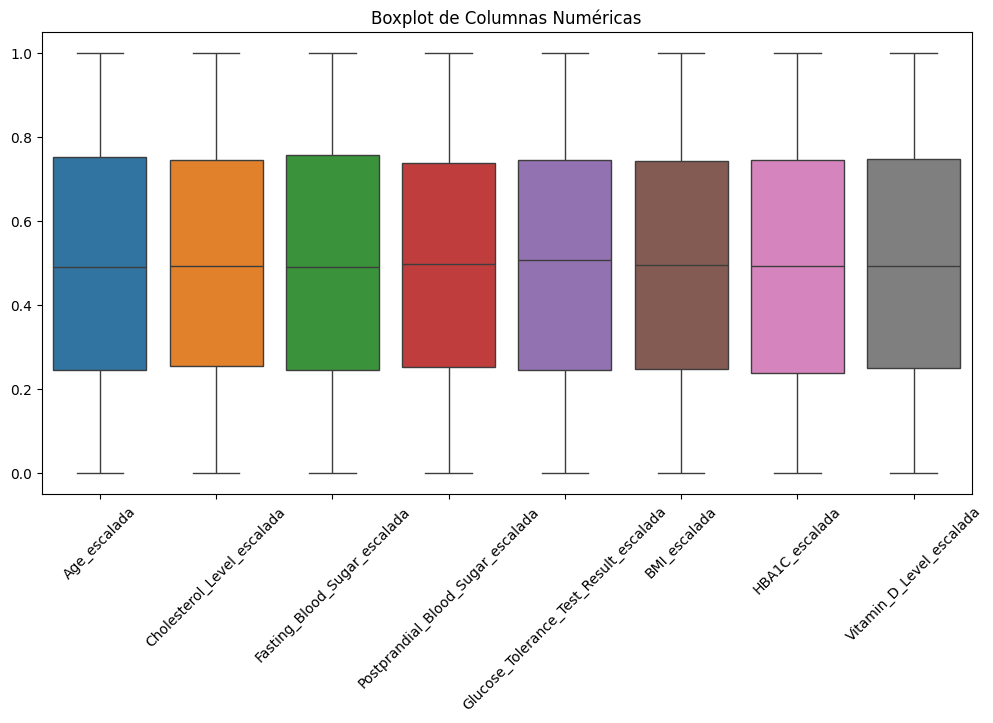

In [ ]:
# Visualización de outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy_escalado[columnas_numericas])
plt.title("Boxplot de Columnas Numéricas")
plt.xticks(rotation=45)
plt.show()

Puedo concluir en base a los gráficos de cajas, que no tengo outliers en las variables analizadas y los rangos son correctos.

El BMI se encuentra en rango normal (menos de 18 es "muy bajo peso" a más de 30 que sería obesidad) de análisis, o sea que no hay valores atípicos.

La Hemoglobina Glicosilada (HBA1C) tiene un rango (menos a 5.7 es normal, y mas de 6.5 presenta diabetes).

Nivel de colesterol, rango (menos de 200 es normal a mas de 240 que es alto)

Fasting_Blood_Sugar, rango (menos a 100 normal, a mas de 126 ya se considera diabetes).

Postprandial_Blood_Sugar, rango (menos a 140 es normal, a mas de 200 que se considera diabetes)

Glucose_Tolerance_Test_Result, rango (menos a 100 es normal, mas de 200 se considera diabetes)

Vitamin_D_Level, rango (menos de 20 se considera insuficiente, entre 30 y 50 se consider normal)


#**Análisis exploratorio de datos**

In [ ]:
desc_stats = df_copy.describe(include = 'all')
print(desc_stats)

                Age Gender          BMI Family_History Physical_Activity  \
count   5292.000000   5292  5292.000000           5292              5292   
unique          NaN      2          NaN              2                 3   
top             NaN   Male          NaN             No            Medium   
freq            NaN   3534          NaN           2664              1782   
mean      48.417989    NaN    27.459883            NaN               NaN   
std       18.040544    NaN     7.194187            NaN               NaN   
min       18.000000    NaN    15.000000            NaN               NaN   
25%       33.000000    NaN    21.200000            NaN               NaN   
50%       48.000000    NaN    27.400000            NaN               NaN   
75%       64.000000    NaN    33.600000            NaN               NaN   
max       79.000000    NaN    40.000000            NaN               NaN   

             Diet_Type Smoking_Status Alcohol_Intake Stress_Level  \
count             

**Análisis univariado**

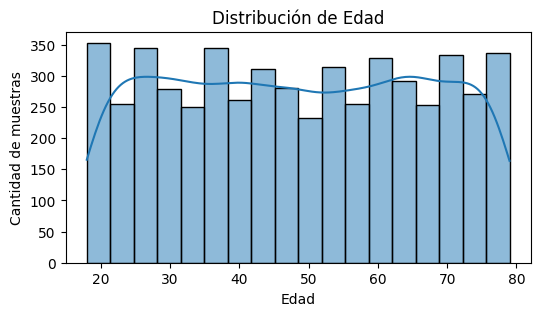

In [ ]:
plt.figure(figsize = (6, 3))
sns.histplot(df_copy['Age'], kde = True) # kde = True suaviza la distribución de los datos para mostrar una curva continua.
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Cantidad de muestras')
plt.show()

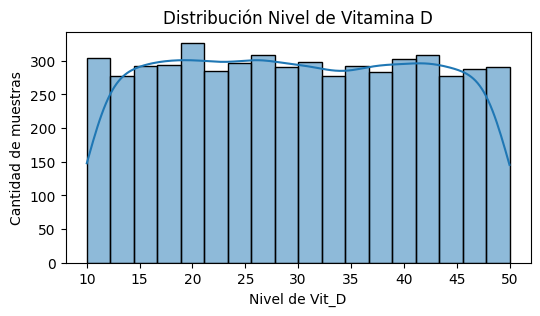

In [ ]:
plt.figure(figsize = (6, 3))
sns.histplot(df_copy['Vitamin_D_Level'], kde = True) # kde = True suaviza la distribución de los datos para mostrar una curva continua.
plt.title('Distribución Nivel de Vitamina D')
plt.xlabel('Nivel de Vit_D')
plt.ylabel('Cantidad de muestras')
plt.show()

En el análisis de la Vitamina D, menos de 20 se considera insuficiente.

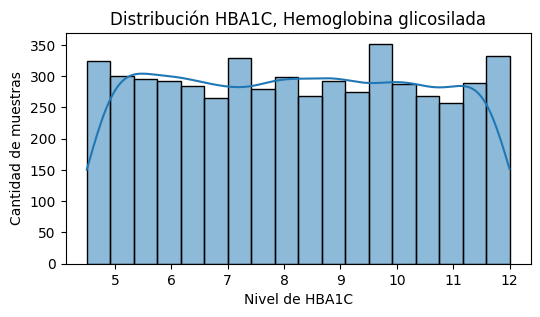

In [ ]:
plt.figure(figsize = (6, 3))
sns.histplot(df_copy['HBA1C'], kde = True)
plt.title('Distribución HBA1C, Hemoglobina glicosilada')
plt.xlabel('Nivel de HBA1C')
plt.ylabel('Cantidad de muestras')
plt.show()

El nivel de HB1AC mayor a 7, indica que el sujeto puede presentar diabetes. En el gráfico vemos que son varias muestras mayores a 7.

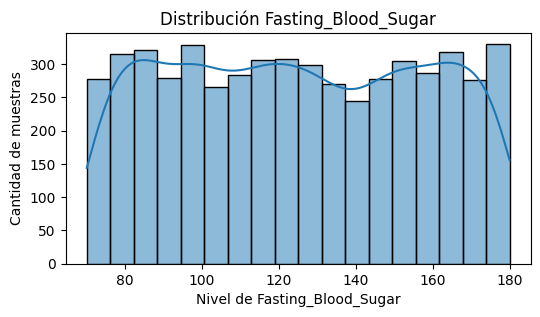

In [ ]:
plt.figure(figsize = (6, 3))
sns.histplot(df_copy['Fasting_Blood_Sugar'], kde = True)
plt.title('Distribución Fasting_Blood_Sugar')
plt.xlabel('Nivel de Fasting_Blood_Sugar')
plt.ylabel('Cantidad de muestras')
plt.show()

Con un nivel mayor a 126 de Fasting_Blood_Sugar, se considera que el sujeto tiene diabetes.

Hago un análisis de los factores que influyen en el estilo de vida (dieta, actividad física, tabaquismo, consumo de alcohol y nivel de estrés) para ver si se correlaciona con la diabetes.

Primero hago las transformaciones correspondientes.

In [ ]:
#Hago otra copia del df
df_copy1 = df_copy.copy()

In [ ]:
#Transformo la variable objetivo 'Diabetes_Status' a numérica (0 o 1)'No' -> 0, 'Yes' -> 1
df_copy1['Diabetes_status_numeric'] = df_copy1['Diabetes_Status'].map({'No': 0, 'Yes': 1})
display(df_copy1.head())

Age  Gender   BMI Family_History Physical_Activity       Diet_Type  \
0   48    Male  35.5             No              High  Non-Vegetarian   
1   18    Male  28.7            Yes            Medium  Non-Vegetarian   
2   21    Male  30.0            Yes              High  Non-Vegetarian   
3   25  Female  25.6             No            Medium      Vegetarian   
4   78    Male  38.8             No              High  Non-Vegetarian   

  Smoking_Status Alcohol_Intake Stress_Level Hypertension  ...  \
0          Never          Never       Medium          Yes  ...   
1        Current       Moderate         High           No  ...   
2        Current       Moderate         High          Yes  ...   
3         Former       Moderate         High          Yes  ...   
4        Current           High         High           No  ...   

   Postprandial_Blood_Sugar  HBA1C  Urban_Rural  \
0                     165.6    8.9        Urban   
1                     142.6    5.9        Rural   
2                     212.4    4.8        Rural   
3                     225.4   11.9        Rural   
4                     218.1   11.6        Urban   

   Medication_For_Chronic_Conditions Pregnancies  \
0                                 No           0   
1                                 No           0   
2                                Yes           0   
3                                Yes           1   
4                                Yes           0   

  Glucose_Tolerance_Test_Result  Vitamin_D_Level  Thyroid_Condition  \
0                         124.3             31.5                Yes   
1                         151.4             12.5                Yes   
2                         106.1             35.8                 No   
3                          85.6             15.4                Yes   
4                          77.0             28.6                 No   

   Diabetes_Status Diabetes_status_numeric  
0              Yes                       1  
1               No                       0  
2              Yes                       1  
3               No                       0  
4              Yes                       1  

[5 rows x 22 columns]

In [ ]:
# Transformo variables categóricas con MÚLTIPLES categorías usando One-Hot Encoding
# Lo aplico a las siguientes variables: Physical_Activity, Diet_Type, Smoking_Status, Alcohol_Intake y Stress_Level
# Uso drop_first=True para no tener multicolinealidad
columns_to_onehot = ['Physical_Activity', 'Diet_Type', 'Smoking_Status','Alcohol_Intake','Stress_Level']
df_processed= pd.get_dummies(df_copy1, columns=columns_to_onehot, drop_first=True, dtype=int)

In [ ]:
one_hot_encoded_cols = [col for col in df_processed.columns if any(col.startswith(prefix + '_') for prefix in columns_to_onehot)]

In [ ]:
columns_for_correlation = one_hot_encoded_cols + ['Diabetes_status_numeric']

In [ ]:
# Creamos un nuevo DataFrame solo con estas columnas para calcular la correlación
df_final_for_corr = df_processed[columns_for_correlation]

In [ ]:
print(df_final_for_corr.head())

   Physical_Activity_Low  Physical_Activity_Medium  Diet_Type_Vegan  \
0                      0                         0                0   
1                      0                         1                0   
2                      0                         0                0   
3                      0                         1                0   
4                      0                         0                0   

   Diet_Type_Vegetarian  Smoking_Status_Former  Smoking_Status_Never  \
0                     0                      0                     1   
1                     0                      0                     0   
2                     0                      0                     0   
3                     1                      1                     0   
4                     0                      0                     0   

   Alcohol_Intake_Moderate  Alcohol_Intake_Never  Stress_Level_Low  \
0                        0                     1                 0   


In [ ]:
#Calculo la Matriz de Correlación
correlation_matrix = df_final_for_corr.corr()


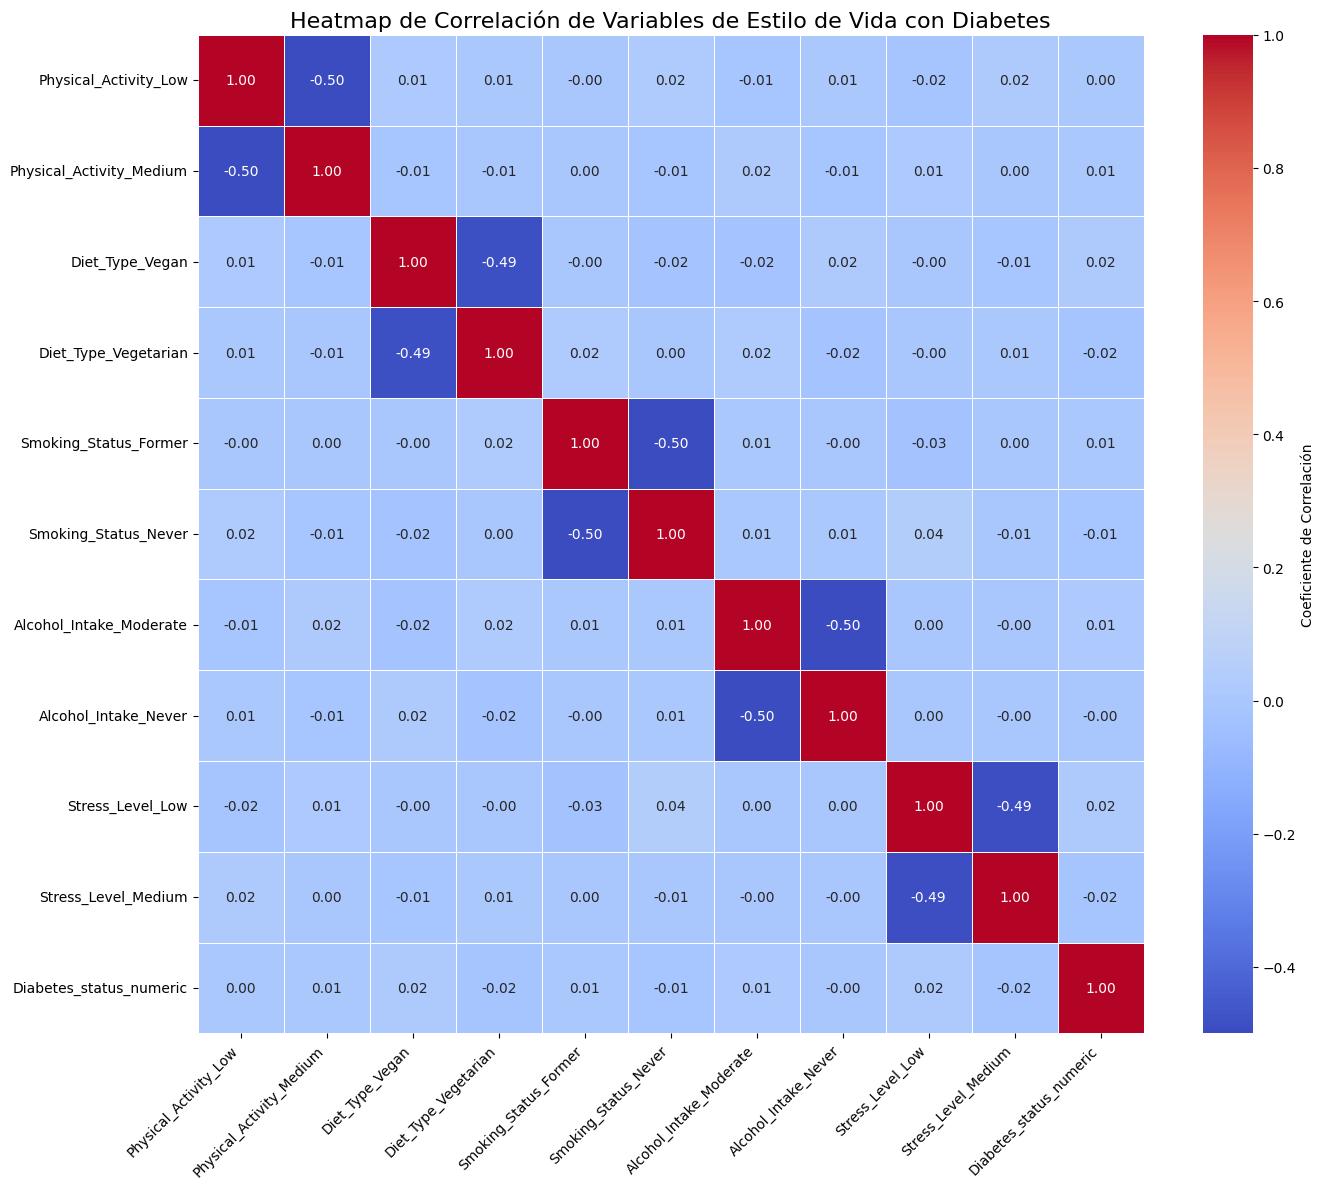

In [ ]:
plt.figure(figsize=(14, 12))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Coeficiente de Correlación'}
)
plt.title('Heatmap de Correlación de Variables de Estilo de Vida con Diabetes', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

El nivel de estrés muestra la correlación lineal más significativa con la presencia de diabetes. Un nivel de estrés bajo se asocia fuertemente con una menor probabilidad de diabetes, mientras que un nivel de estrés medio se asocia fuertemente con una mayor probabilidad de diabetes.



Realizo un análisis con gáficos de barras comparando antecedentes familiares, si son fumadores, si ingieren alcohol y si son hipertensos.

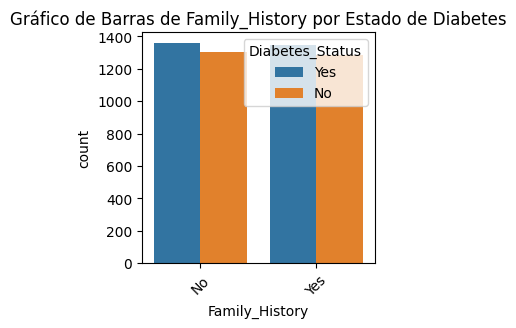

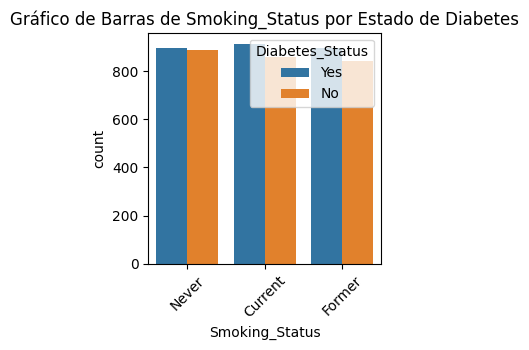

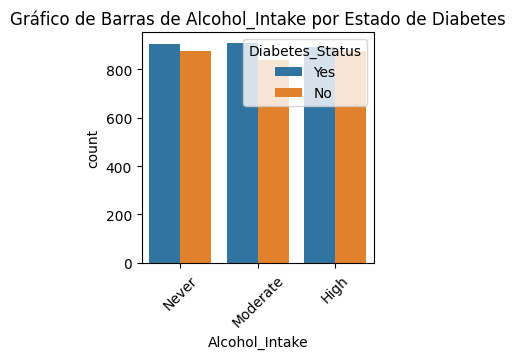

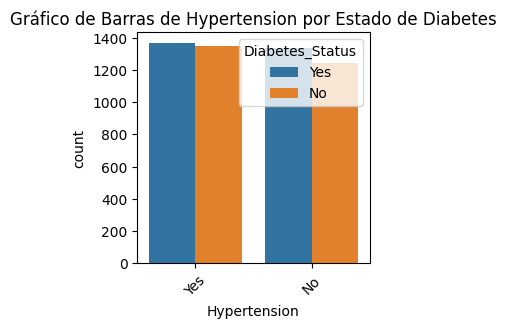

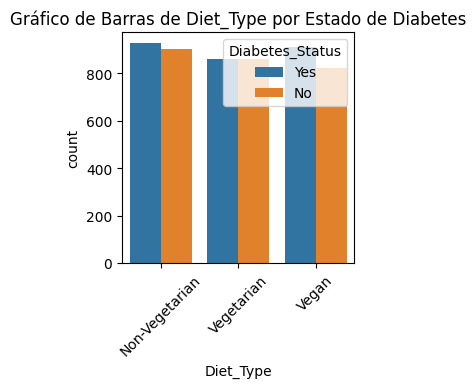

In [ ]:
# Columnas categóricas relevantes
categorical_cols = ['Family_History', 'Smoking_Status', 'Alcohol_Intake','Hypertension','Diet_Type']

# Creo gráficos de barras para cada columna categórica
for col in categorical_cols:
    plt.figure(figsize=(3, 3))
    sns.countplot(data=df_copy, x=col, hue='Diabetes_Status')
    plt.title(f'Gráfico de Barras de {col} por Estado de Diabetes')
    plt.xticks(rotation=45)
    plt.show()

Los que son fumadores, toman alcohol, son hipertensos y no son vegetarianos tienen mas posibilidades de tener diabetes.

**Análisis multivariado**

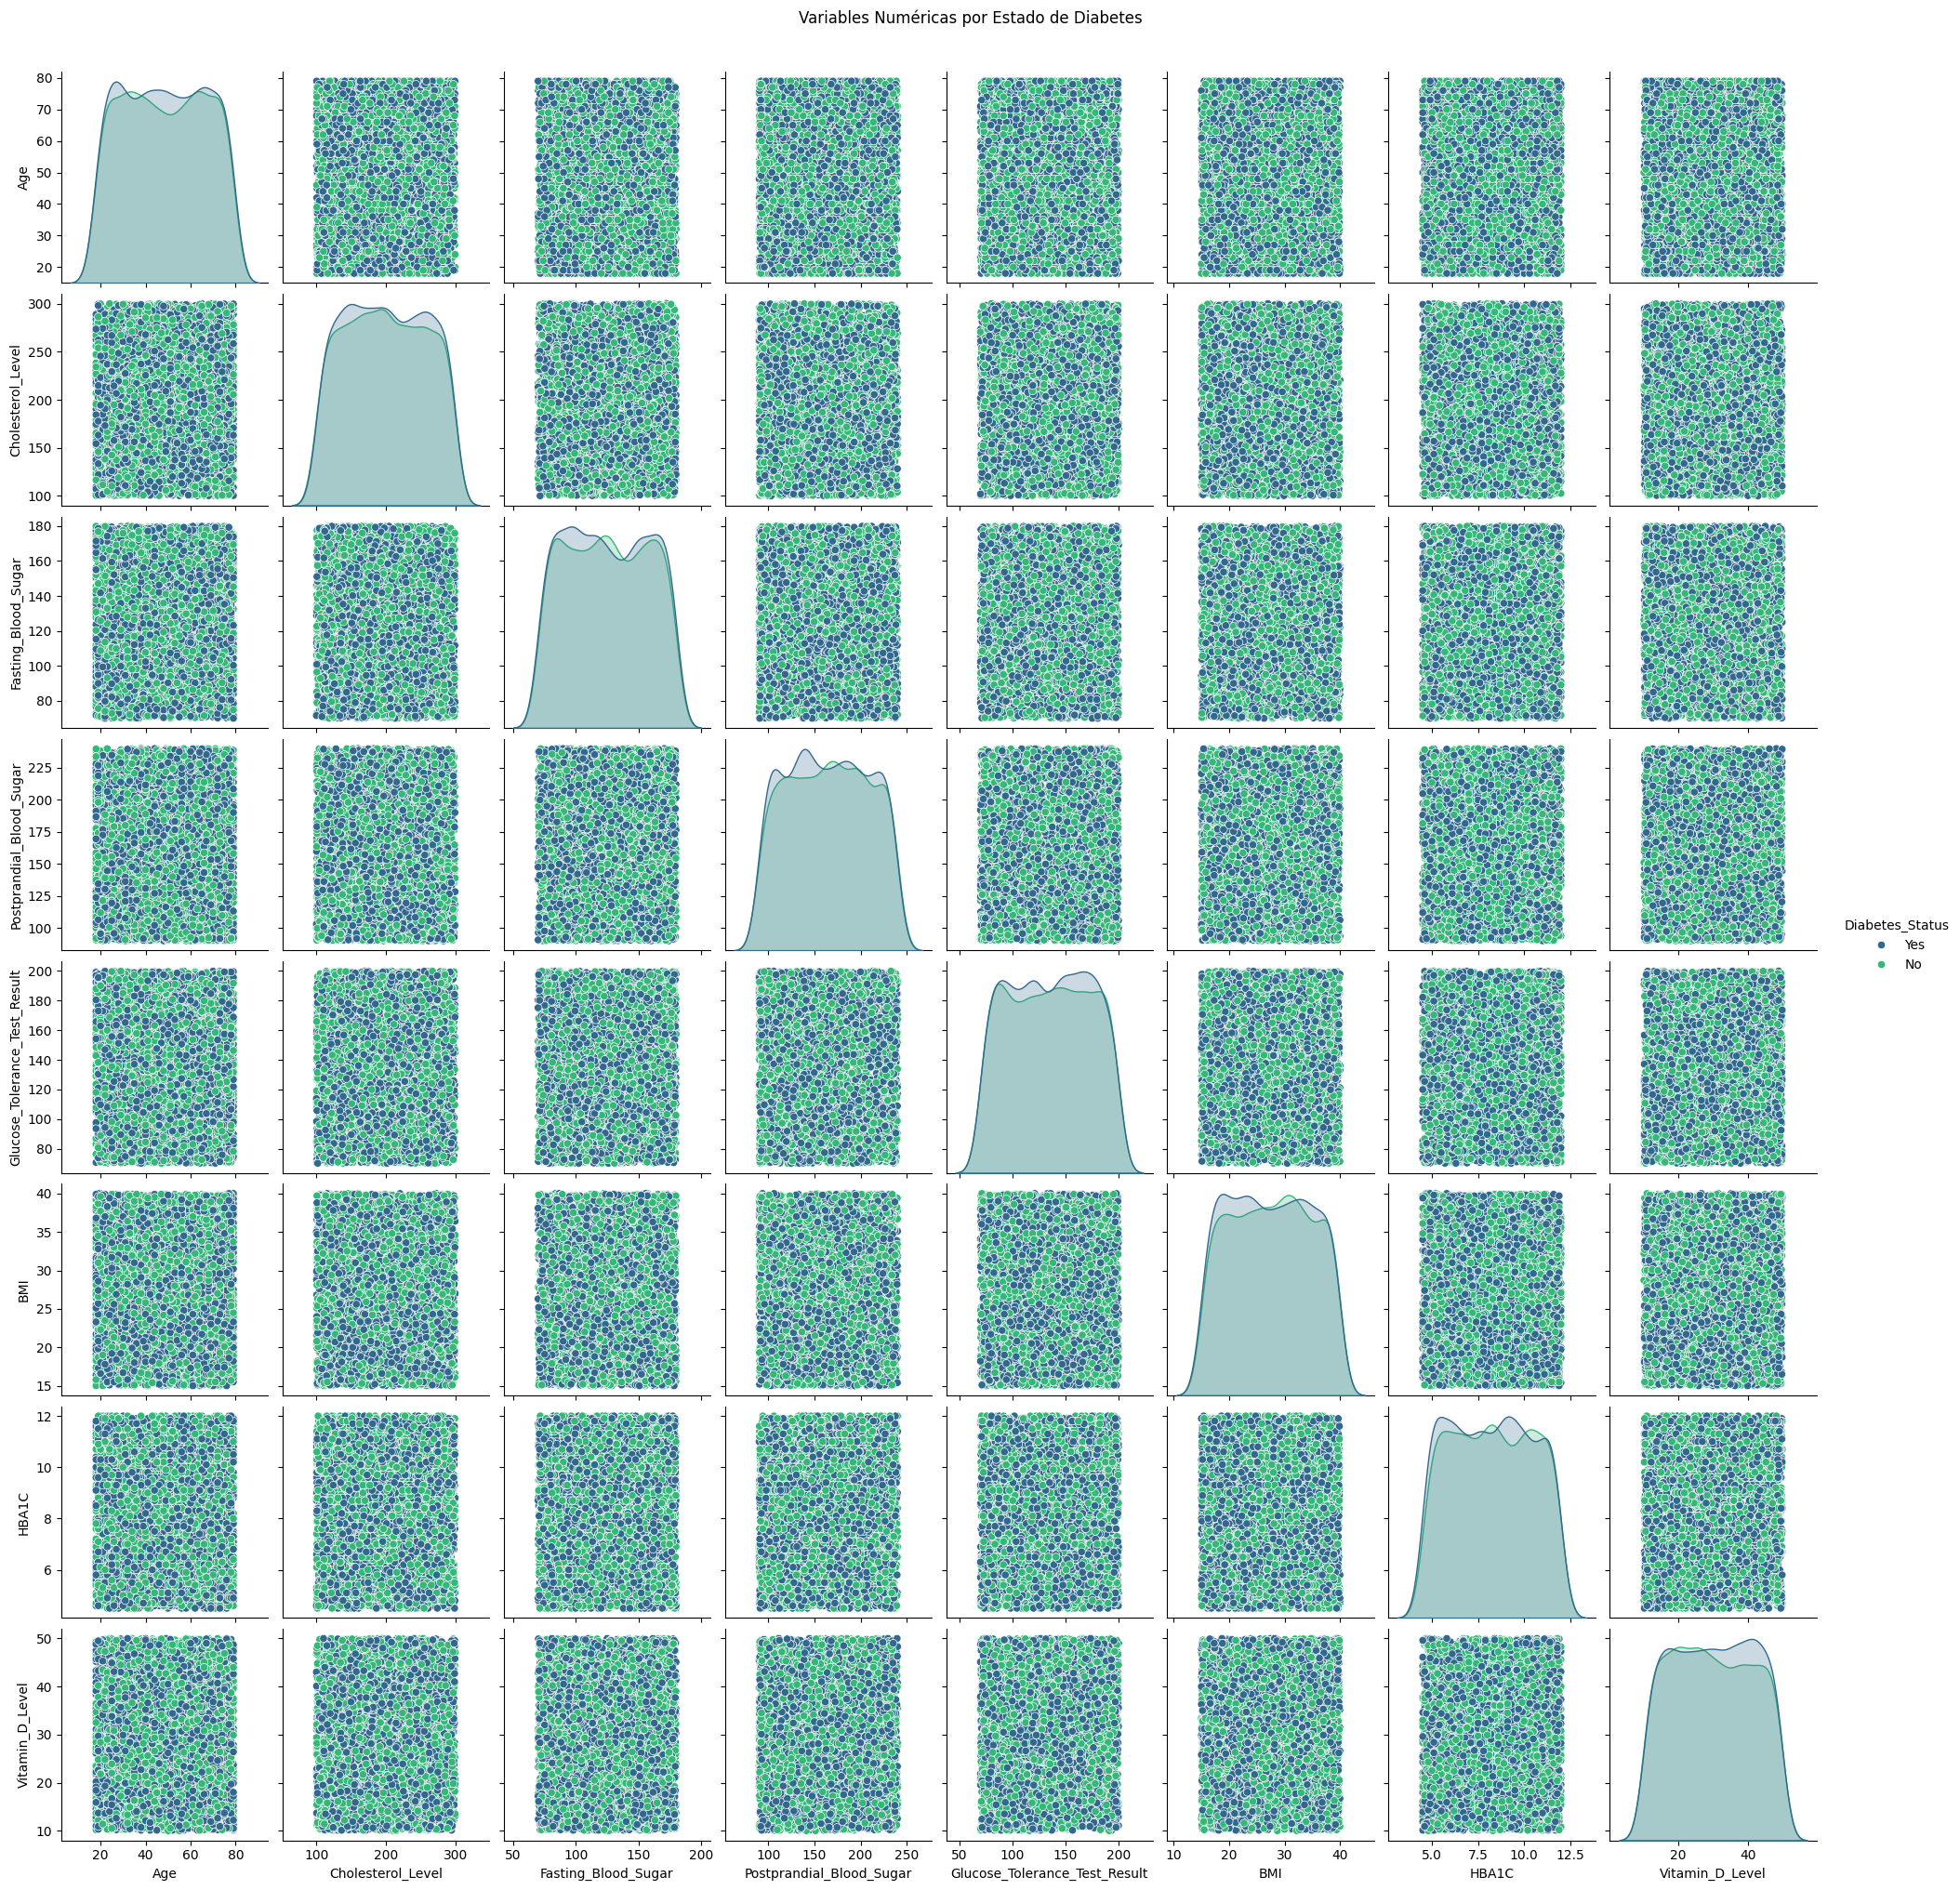

In [ ]:
#Pruebo hacer un pairplot
col_numerics = [
   'Age','Cholesterol_Level',
   'Fasting_Blood_Sugar', 'Postprandial_Blood_Sugar',
 'Glucose_Tolerance_Test_Result','BMI','HBA1C',
   'Vitamin_D_Level'
]
sns.pairplot(df_copy1, vars=col_numerics, hue='Diabetes_Status', diag_kind='kde', palette='viridis')
plt.suptitle("Variables Numéricas por Estado de Diabetes", y=1.02) # Ajusta 'y' para evitar que se superponga
plt.show()

En la diagonal principal kde, puedo ver que no existen diferencias significativas entre individuos con o sin diabetes en Age, Cholesterol_Level, BMI, HBA1C y Vitamin_D_Level.

En Fasting_Blood_Sugar hay un pico pequeño y aplanado, desplazado hacia valores más altos y representa a personas con diabetes.

En Postprandial_Blood_Sugar los niveles son mas altos en las personas con diabetes.

En Glucose_Tolerance_Test_Result las graficas son diferentes ente los grupos por lo que la convierte en una de las variables más predictivas para el Diabetes_Status.


#**Feature selection**

Defino mi variable objetivo, en este caso "Diabetes_Status".

Mis variables independientes son todas las demás columnas que voy a usar como entradas para predecir la variable objetivo.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler

In [ ]:
#Separaro X e y
X = df_copy.drop(columns = ['Diabetes_Status'])
y = df_copy['Diabetes_Status']
print("--- Variable Objetivo (y) ---")
print(y.head())
print("\n--- Variables Independientes (X) ---")
print(X.head())

--- Variable Objetivo (y) ---
0    Yes
1     No
2    Yes
3     No
4    Yes
Name: Diabetes_Status, dtype: object

--- Variables Independientes (X) ---
   Age  Gender   BMI Family_History Physical_Activity       Diet_Type  \
0   48    Male  35.5             No              High  Non-Vegetarian   
1   18    Male  28.7            Yes            Medium  Non-Vegetarian   
2   21    Male  30.0            Yes              High  Non-Vegetarian   
3   25  Female  25.6             No            Medium      Vegetarian   
4   78    Male  38.8             No              High  Non-Vegetarian   

  Smoking_Status Alcohol_Intake Stress_Level Hypertension  Cholesterol_Level  \
0          Never          Never       Medium          Yes              111.7   
1        Current       Moderate         High           No              130.6   
2        Current       Moderate         High          Yes              294.8   
3         Former       Moderate         High          Yes              159.1   
4        Cu

**Codificación de variables categóricas**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler


In [ ]:
#Codifico la variable objetivo
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)
print(y_encoded)

[1 0 1 ... 1 1 1]


In [ ]:
#Creo unas listas de columnas a analizar
numerical_cols = ['Age', 'BMI', 'Cholesterol_Level', 'Fasting_Blood_Sugar',
                  'Postprandial_Blood_Sugar', 'HBA1C', 'Glucose_Tolerance_Test_Result',
                  'Vitamin_D_Level', 'Pregnancies']

binary_cols = ['Gender', 'Family_History', 'Hypertension',
               'Medication_For_Chronic_Conditions',
               'Thyroid_Condition', 'Urban_Rural']

ordinal_cols_map = {
    'Physical_Activity': ['Low', 'Medium', 'High'],
    'Alcohol_Intake': ['Never', 'Moderate', 'High'],
    'Stress_Level': ['Low', 'Medium', 'High'],
    'Smoking_Status':['Never', 'Current', 'Former']
}

nominal_cols = ['Diet_Type']

In [ ]:
#Divido los datos antes de codificar y escalar
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

In [ ]:
# X_train y X_test
X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

# Codificación Binaria / Mapeo para binary_cols
for col in binary_cols:
    le_bin = LabelEncoder()
    X_train_processed[col] = le_bin.fit_transform(X_train_processed[col])
    X_test_processed[col] = le_bin.transform(X_test_processed[col])

#Codificación Ordinal para ordinal_cols
for col, categories in ordinal_cols_map.items():
    oe = OrdinalEncoder(categories=[categories])
    X_train_processed[col] = oe.fit_transform(X_train_processed[[col]])
    X_test_processed[col] = oe.transform(X_test_processed[[col]])

#One-Hot Encoding para nominal_cols
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe_train_features = ohe.fit_transform(X_train_processed[nominal_cols])
ohe_test_features = ohe.transform(X_test_processed[nominal_cols])

#Convertir a DataFrame y concatenar
ohe_train_df = pd.DataFrame(ohe_train_features, columns=ohe.get_feature_names_out(nominal_cols), index=X_train_processed.index)
ohe_test_df = pd.DataFrame(ohe_test_features, columns=ohe.get_feature_names_out(nominal_cols), index=X_test_processed.index)

X_train_processed = pd.concat([X_train_processed.drop(columns=nominal_cols), ohe_train_df], axis=1)
X_test_processed = pd.concat([X_test_processed.drop(columns=nominal_cols), ohe_test_df], axis=1)

#Escalado de Variables Numéricas usando standardScaler
scaler = StandardScaler()
X_train_processed[numerical_cols] = scaler.fit_transform(X_train_processed[numerical_cols])
X_test_processed[numerical_cols] = scaler.transform(X_test_processed[numerical_cols])

print("\n--- X_train después de preprocesamiento ---")
print(X_train_processed.head())
print(f"Dimensiones de X_train_processed: {X_train_processed.shape}")


--- X_train después de preprocesamiento ---
           Age  Gender       BMI  Family_History  Physical_Activity  \
1209 -0.186032       1  0.577549               0                2.0   
5243  1.030653       1 -1.207511               1                1.0   
3036  1.307173       0  0.061555               1                1.0   
1158  0.256399       1  0.354417               0                2.0   
5203 -1.292109       0  0.396254               0                2.0   

      Smoking_Status  Alcohol_Intake  Stress_Level  Hypertension  \
1209             2.0             2.0           0.0             0   
5243             0.0             0.0           2.0             1   
3036             2.0             0.0           0.0             1   
1158             1.0             1.0           1.0             0   
5203             0.0             2.0           1.0             1   

      Cholesterol_Level  ...     HBA1C  Urban_Rural  \
1209          -0.805460  ... -0.386810            1   
5243     

In [ ]:
#A modo de prueba, veo que no haya nulos
X_train_processed.isnull().sum().sum()

np.int64(0)

In [ ]:
# Veo como se comporta despues del escalado
X_train_processed.describe()


Age       Gender           BMI  Family_History  \
count  4.233000e+03  4233.000000  4.233000e+03     4233.000000   
mean  -3.525017e-17     0.664541 -4.700023e-17        0.496811   
std    1.000118e+00     0.472207  1.000118e+00        0.500049   
min   -1.679236e+00     0.000000 -1.737451e+00        0.000000   
25%   -9.049819e-01     0.000000 -8.867581e-01        0.000000   
50%   -2.012000e-02     1.000000  5.772032e-03        0.000000   
75%    8.647419e-01     1.000000  8.564648e-01        1.000000   
max    1.694300e+00     1.000000  1.748995e+00        1.000000   

       Physical_Activity  Smoking_Status  Alcohol_Intake  Stress_Level  \
count        4233.000000     4233.000000     4233.000000   4233.000000   
mean            0.999528        0.983700        1.006615      1.007796   
std             0.817171        0.818598        0.820895      0.819877   
min             0.000000        0.000000        0.000000      0.000000   
25%             0.000000        0.000000        0.000000      0.000000   
50%             1.000000        1.000000        1.000000      1.000000   
75%             2.000000        2.000000        2.000000      2.000000   
max             2.000000        2.000000        2.000000      2.000000   

       Hypertension  Cholesterol_Level  ...         HBA1C  Urban_Rural  \
count   4233.000000       4.233000e+03  ...  4.233000e+03  4233.000000   
mean       0.514056       2.828407e-16  ...  2.064653e-16     0.491377   
std        0.499861       1.000118e+00  ...  1.000118e+00     0.499985   
min        0.000000      -1.749022e+00  ... -1.715284e+00     0.000000   
25%        0.000000      -8.492244e-01  ... -8.907142e-01     0.000000   
50%        1.000000      -2.470205e-02  ... -2.033451e-02     0.000000   
75%        1.000000       8.698434e-01  ...  8.500452e-01     1.000000   
max        1.000000       1.752135e+00  ...  1.720425e+00     1.000000   

       Medication_For_Chronic_Conditions   Pregnancies  \
count                        4233.000000  4.233000e+03   
mean                            0.505079 -2.643763e-17   
std                             0.500033  1.000118e+00   
min                             0.000000 -5.645566e-01   
25%                             0.000000 -5.645566e-01   
50%                             1.000000 -5.645566e-01   
75%                             1.000000  1.822459e-01   
max                             1.000000  2.796055e+00   

       Glucose_Tolerance_Test_Result  Vitamin_D_Level  Thyroid_Condition  \
count                   4.233000e+03     4.233000e+03         4233.00000   
mean                    7.050034e-17    -2.417155e-16            0.50437   
std                     1.000118e+00     1.000118e+00            0.50004   
min                    -1.726084e+00    -1.724739e+00            0.00000   
25%                    -8.795299e-01    -8.582777e-01            0.00000   
50%                     3.091531e-02    -9.145639e-03            1.00000   
75%                     8.508484e-01     8.659803e-01            1.00000   
max                     1.732010e+00     1.741106e+00            1.00000   

       Diet_Type_Non-Vegetarian  Diet_Type_Vegan  Diet_Type_Vegetarian  
count               4233.000000      4233.000000           4233.000000  
mean                   0.341365         0.329554              0.329081  
std                    0.474224         0.470107              0.469935  
min                    0.000000         0.000000              0.000000  
25%                    0.000000         0.000000              0.000000  
50%                    0.000000         0.000000              0.000000  
75%                    1.000000         1.000000              1.000000  
max                    1.000000         1.000000              1.000000  

[8 rows x 22 columns]

# **Modelos**

In [ ]:
# Propongo un modelo de regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_processed, y_train_encoded)

LogisticRegression(random_state=42)

In [ ]:
y_pred_log_reg = log_reg.predict(X_test_processed)
y_prob_log_reg = log_reg.predict_proba(X_test_processed)[:, 1]

print("--- Evaluación de Regresión Logística ---")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_log_reg):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_encoded, y_prob_log_reg):.4f}")
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_log_reg))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_log_reg))

--- Evaluación de Regresión Logística ---
Accuracy: 0.5090
ROC AUC: 0.5149

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44       517
           1       0.52      0.62      0.56       542

    accuracy                           0.51      1059
   macro avg       0.51      0.51      0.50      1059
weighted avg       0.51      0.51      0.50      1059


Confusion Matrix:
 [[205 312]
 [208 334]]


El modelo de Regresión Logística desarrollado para predecir si existe Diabetes no es bueno, no es capaz de predecir realmente si tiene diabetes. Con una exactitud del 50.8% y un ROC AUC de 0.5149.

La precisión es baja para ambas clases (50% para 'No Diabetes' y 52% para 'Diabetes'), indicando que el modelo genera predicciones incorrectas en ambos sentidos. Aunque el recall para la clase 'Diabetes' es ligeramente más alto (62%), la tasa de Falsos Negativos (208 casos, donde se predice 'No Diabetes' pero la persona sí la tiene) sigue siendo considerable, siendo preocupante en un contexto de detección de enfermedades.

La matriz de confusión confirma estas debilidades, mostrando una distribución casi equitativa de errores de clasificación, con un número elevado de Falsos Positivos y Falsos Negativos en relación con las predicciones correctas.

In [ ]:
# Propongo un modelo de KNN
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_processed, y_train_encoded)

KNeighborsClassifier()

In [ ]:
y_pred_knn= knn_model.predict(X_test_processed)


In [ ]:
print("K-nearest neighbors")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test_encoded, y_pred_knn))
print(confusion_matrix(y_test_encoded, y_pred_knn))
print(classification_report(y_test_encoded, y_pred_knn))

K-nearest neighbors
Accuracy: 0.5146364494806421
ROC AUC: 0.5141427623173718
[[255 262]
 [252 290]]
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       517
           1       0.53      0.54      0.53       542

    accuracy                           0.51      1059
   macro avg       0.51      0.51      0.51      1059
weighted avg       0.51      0.51      0.51      1059



Veo que los resultados son muy parecidos al modelo de Regresión, por loo que voy a seguir probando modelos.

In [ ]:
# Ahora propongo un modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1) # n_jobs=-1 usa todos los núcleos de CPU

# Entreno el modelo
print("\n--- Entrenando el modelo Random Forest ---")
rf_model.fit(X_train_processed, y_train_encoded)
print("¡Entrenamiento completado!")




--- Entrenando el modelo Random Forest ---
¡Entrenamiento completado!


In [ ]:
# Predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test_processed)
y_prob_rf = rf_model.predict_proba(X_test_processed)[:, 1]

# Rendimiento del modelo
print("\n Evaluación del Modelo Random Forest")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_encoded, y_prob_rf):.4f}")

print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_rf))




 Evaluación del Modelo Random Forest
Accuracy: 0.5080
ROC AUC: 0.5043

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.48      0.49       517
           1       0.52      0.53      0.53       542

    accuracy                           0.51      1059
   macro avg       0.51      0.51      0.51      1059
weighted avg       0.51      0.51      0.51      1059


Confusion Matrix:
 [[249 268]
 [253 289]]


In [ ]:
#Importancia de las características analizadas
print("\n Importancia de las Características: ")
feature_importances_rf = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Muestro las 15 características más importantes
print(feature_importances_rf.head(15))


 Importancia de las Características: 
                          Feature  Importance
16  Glucose_Tolerance_Test_Result    0.098626
10            Fasting_Blood_Sugar    0.097959
11       Postprandial_Blood_Sugar    0.097454
9               Cholesterol_Level    0.097163
17                Vitamin_D_Level    0.094778
2                             BMI    0.092848
12                          HBA1C    0.086645
0                             Age    0.082114
6                  Alcohol_Intake    0.026552
4               Physical_Activity    0.026325
5                  Smoking_Status    0.026225
15                    Pregnancies    0.026020
7                    Stress_Level    0.025120
13                    Urban_Rural    0.015903
3                  Family_History    0.015864


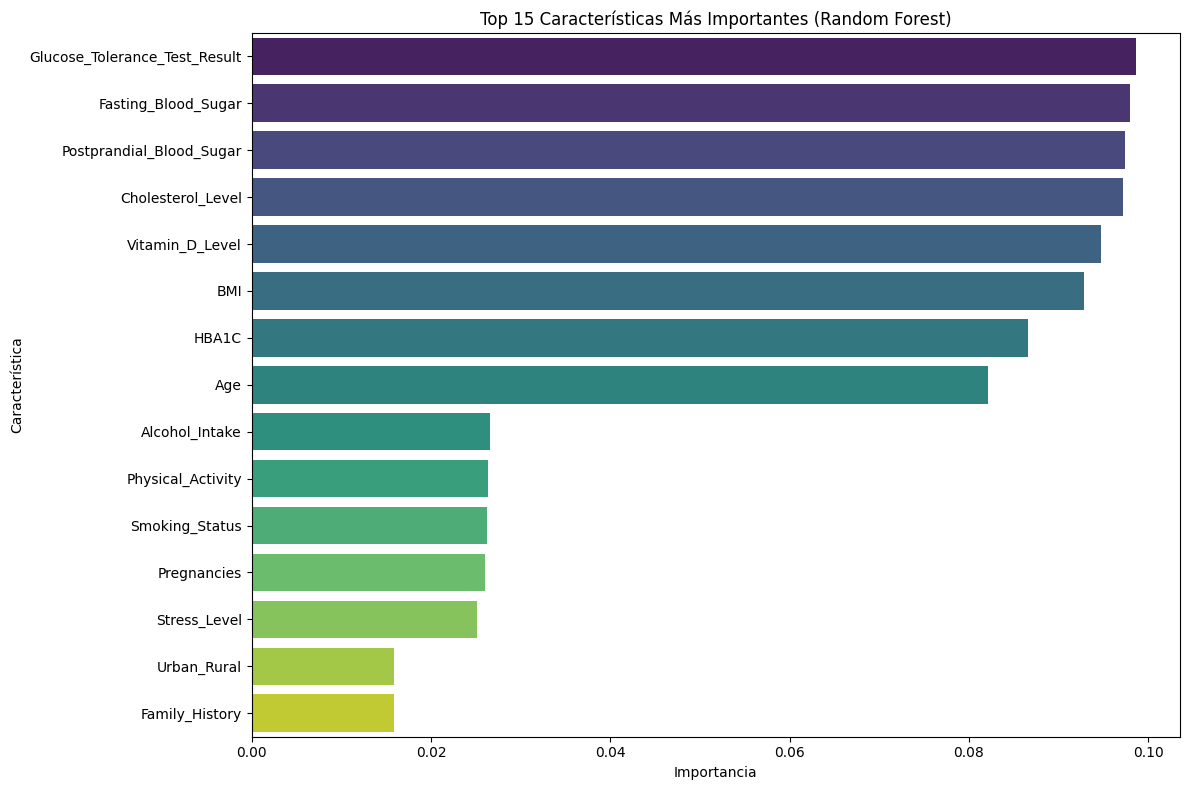

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf.head(15), palette='viridis')
plt.title('Top 15 Características Más Importantes (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

A pesar de la implementación de un modelo más avanzado como Random Forest, el rendimiento predictivo para el Estado de Diabetes permanece en niveles malos. Con una exactitud del 50.42% y un ROC AUC de 0.5127, el modelo demuestra baja capacidad para saber si tiene o no diabetes.

Las métricas de precisión, recall y F1-score son bajas para ambas clases, lo que indica que el modelo no logra identificar confiablemente a los individuos en ninguno de los grupos. Específicamente, la alta proporción de Falsos Negativos (255 casos), donde se predice la ausencia de diabetes en individuos que sí la tienen.

In [ ]:
#Propongo un modelo de XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=600,
    learning_rate=0.06,
    max_depth=5,
    subsample=0.7,
    colsample_bytree=0.7,
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1
)

# Entreno el modelo
print("\n--- Entrenando el modelo XGBoost ---")
xgb_model.fit(X_train_processed, y_train_encoded)
print("¡Entrenamiento completado!")


--- Entrenando el modelo XGBoost ---
¡Entrenamiento completado!


In [ ]:
#Hago las predicciones en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test_processed)
y_prob_xgb = xgb_model.predict_proba(X_test_processed)[:, 1]

#Evalúo el rendimiento del modelo
print("\n--- Evaluación del Modelo XGBoost ---")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_xgb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_encoded, y_prob_xgb):.4f}")

print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_xgb))


--- Evaluación del Modelo XGBoost ---
Accuracy: 0.5184
ROC AUC: 0.5040

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.50      0.50       517
           1       0.53      0.54      0.53       542

    accuracy                           0.52      1059
   macro avg       0.52      0.52      0.52      1059
weighted avg       0.52      0.52      0.52      1059


Confusion Matrix:
 [[259 258]
 [252 290]]



--- Importancia de las Características ---
                          Feature  Importance
11       Postprandial_Blood_Sugar    0.051742
16  Glucose_Tolerance_Test_Result    0.049594
6                  Alcohol_Intake    0.049390
17                Vitamin_D_Level    0.048422
9               Cholesterol_Level    0.048257
12                          HBA1C    0.047806
2                             BMI    0.047714
10            Fasting_Blood_Sugar    0.047505
15                    Pregnancies    0.047040
0                             Age    0.046607
4               Physical_Activity    0.046044
21           Diet_Type_Vegetarian    0.045073
5                  Smoking_Status    0.044444
19       Diet_Type_Non-Vegetarian    0.043686
18              Thyroid_Condition    0.043026


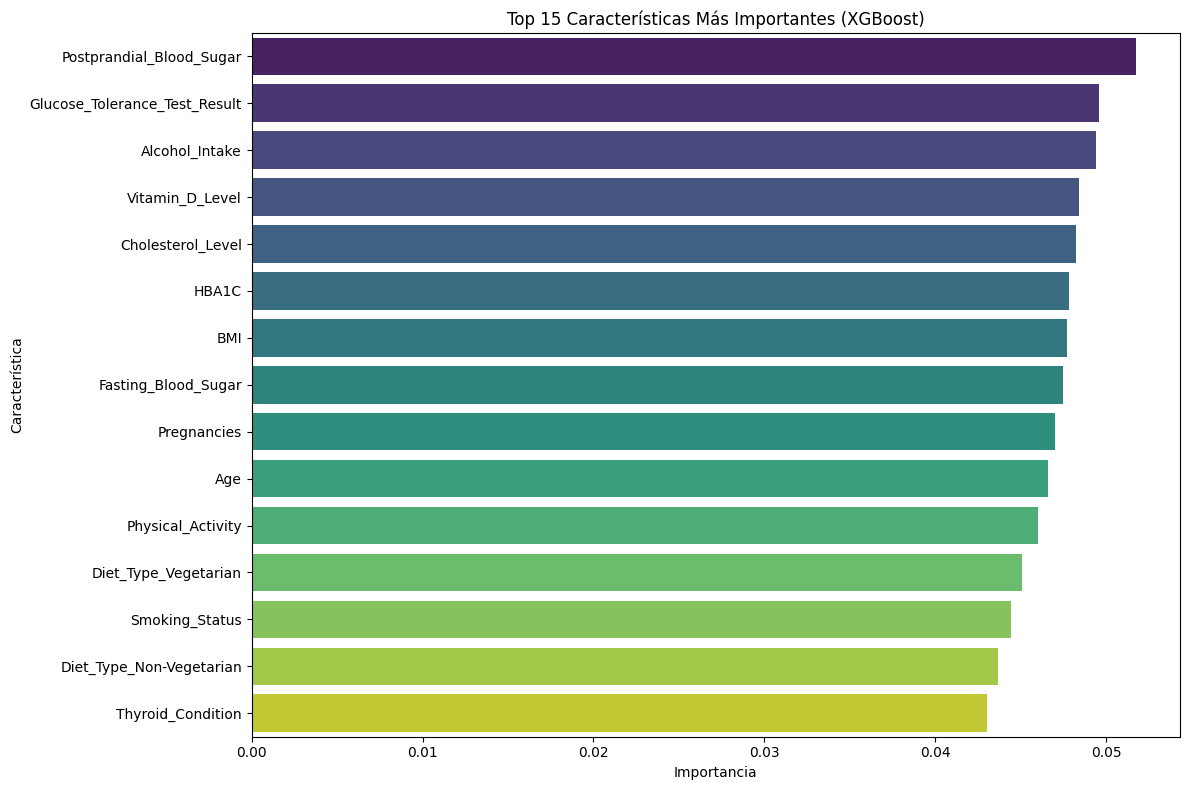

In [ ]:
#Importancia de las características
print("\n--- Importancia de las Características ---")
feature_importances_xgb = pd.DataFrame({
    'Feature': X_train_processed.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances_xgb.head(15)) # Muestro las 15 características más importantes

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_xgb.head(15), palette='viridis')
plt.title('Top 15 Características Más Importantes (XGBoost)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.tight_layout()
plt.show()

El modelo XGBoost, implementado como un intento de mejorar el rendimiento predictivo después de los resultados insatisfactorios de la Regresión Logística y Random Forest, no logró superar las limitaciones observadas en los modelos anteriores. Las métricas de evaluación indican que este modelo no es capaz de realizar predicciones significativas sobre el Estado de Diabetes.

Considero hacer un GridSearchCV para optimizar los hiperparámetros.

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Defino la cuadrícula de parámetros a probar
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Uso StratifiedKFold para la validación cruzada, para mantener el balance de clases
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss',
                                use_label_encoder=False, random_state=42, n_jobs=-1),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    verbose=1,
    n_jobs=-1
)

In [ ]:
print("\n--- Iniciando GridSearchCV para XGBoost ---")
grid_search.fit(X_train_processed, y_train_encoded)

print(f"\nMejores parámetros encontrados: {grid_search.best_params_}")
print(f"Mejor ROC AUC en CV: {grid_search.best_score_:.4f}")

# Evaluar el mejor modelo en el conjunto de prueba
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_processed)
y_prob_best_xgb = best_xgb_model.predict_proba(X_test_processed)[:, 1]

print("\n--- Evaluación del Mejor Modelo XGBoost (con Hyperparameter Tuning) ---")
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred_best_xgb):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test_encoded, y_prob_best_xgb):.4f}")
print("\nClassification Report:\n", classification_report(y_test_encoded, y_pred_best_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_best_xgb))


--- Iniciando GridSearchCV para XGBoost ---
Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Mejores parámetros encontrados: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Mejor ROC AUC en CV: 0.4973

--- Evaluación del Mejor Modelo XGBoost (con Hyperparameter Tuning) ---
Accuracy: 0.4797
ROC AUC: 0.4716

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.46      0.46       517
           1       0.49      0.50      0.49       542

    accuracy                           0.48      1059
   macro avg       0.48      0.48      0.48      1059
weighted avg       0.48      0.48      0.48      1059


Confusion Matrix:
 [[239 278]
 [273 269]]


La aplicación de un modelo XGBoost con un exhaustivo ajuste de hiperparámetros mediante GridSearchCV no ha logrado mejorar el rendimiento predictivo para el Diabetes_Status. Los resultados obtenidos en el conjunto de prueba, con una exactitud del 47.97% y un ROC AUC de 0.4716, son incluso inferiores a los de los modelos anteriores y consistentemente peores que una predicción aleatoria.

Esto indica que, a pesar de utilizar un algoritmo de vanguardia y optimizar sus parámetros, el modelo carece fundamentalmente de la capacidad para discernir patrones predictivos en el dataset actual. La consistencia de los resultados deficientes a través de diferentes modelos (Regresión Logística, Random Forest, y ahora XGBoost optimizado) sugiere fuertemente que la señal predictiva en las características disponibles es débil o inexistente para el problema de clasificación planteado. El modelo no puede aprender a diferenciar entre individuos con y sin diabetes basándose en los datos proporcionados."

# Conclusión Final

El objetivo de este proyecto fue construir y evaluar modelos de machine learning para predecir el estado de diabetes usando un conjunto de datos que incluye variables de estilo de vida y métricas médicas. Se implementaron y evaluaron una variedad de modelos de clasificación, incluyendo Regresión Logística, K-Nearest Neighbors, Random Forest y XGBoost, con el fin de identificar el algoritmo con el mejor rendimiento.

A pesar de la aplicación de diferentes enfoques de modelado y la optimización de hiperparámetros (mediante GridSearchCV para XGBoost), los resultados obtenidos revelan un patrón consistente y una conclusión definitiva:
ninguno de los modelos implementados logró aprender patrones predictivos significativos de los datos.

Las métricas de rendimiento para todos los modelos fueron consistentemente pobres y se mantuvieron en un rango muy similar a una clasificación aleatoria. Las principales observaciones que respaldan esta conclusión son:

Rendimiento Equivalente al Azar: La métrica ROC AUC, que mide la capacidad discriminatoria del modelo, se mantuvo en un rango muy bajo (entre 0.50 y 0.52 para los modelos no optimizados), lo que indica que los modelos son apenas mejores que adivinar al azar. El GridSearchCV incluso arrojó un ROC AUC de 0.47, lo que sugiere que el modelo se desempeñaba peor que el azar.

Baja Precisión y Recall: Los valores de precision y recall para ambas clases (diabetes y no diabetes) no superaron significativamente el umbral del 50%, lo que demuestra que los modelos tienen una alta tasa de errores tanto de falsos positivos como de falsos negativos.

Resultados Consistentes entre Algoritmos: La similitud en los resultados de modelos tan diversos como la Regresión Logística, Random Forest y XGBoost (basados en árboles) y KNN, señala que el problema no reside en la elección del algoritmo, sino en la calidad, relevancia o preprocesamiento de las características de entrada. La falta de una señal predictiva fuerte es una limitación fundamental que ningún modelo, por sofisticado que sea, puede superar.

Confirmación Visual: El análisis exploratorio de datos (EDA) previo, especialmente la matriz de correlación (heatmap) y los pairplots, ya había insinuado esta conclusión. Mientras que las variables directamente relacionadas con la glucosa mostraban una clara separación, las variables de estilo de vida presentaban correlaciones muy débiles, sugiriendo que la señal predictiva del conjunto de datos global no era lo suficientemente robusta.

En conclusión, este proyecto ha demostrado de manera concluyente que el conjunto de datos, en su estado actual, no contiene la información necesaria para construir un modelo de machine learning eficaz para predecir el estado de diabetes.

Recomendaciones para el Futuro:

Para avanzar en este proyecto, se recomienda enfáticamente redirigir los esfuerzos hacia:

Ingeniería de Características: Realizar un análisis más profundo para crear nuevas características a partir de las existentes que puedan capturar interacciones no lineales o relaciones más complejas.

Análisis de Variables: Identificar y priorizar las variables que realmente tienen un impacto predictivo, posiblemente descartando aquellas que actúan como "ruido" en el modelo.

Recopilación de Más Datos: Considerar la posibilidad de que el conjunto de datos sea limitado en tamaño o que carezca de variables clínicas más detalladas que son cruciales para el diagnóstico de la diabetes.

Se concluye que el modelo no es viable para su uso en un entorno de producción debido a su falta de capacidad predictiva.